#### CS 260 Final Project - Fall 2021
---

# NBA Statistics 2021



### By: Nolan Beck, Jayden Carlucci, and Louis Riccardelli


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

---

## 1. Introduction:




**What variables are associated with better basketball gameplay statistics?**

That is the question which we sought to answer when beginning this analysis. Using the data broken down below, we elected to look at statistics from the most recent completed season of the National Basketball Association (that being 2020-2021). Our original questions became more refined as we made visualizations and combed through the data, bringing us to the follwing questions:

1. We began our analysis with this basic question: how well did NBA teams shoot for the 2021 season? Using a histogram and effective field goal percentage (a shooting percentage metric that takes into account that a 3 point field goal is worth more than a 2 point field goal), we discovered that a plurality of teams had an effective field goal percentage between 50% and 51% during the 2020-2021 NBA season. As we had anticipated beforehand, the rest of the data was normally distributed around this bin.
1. We next asked: what statistic tied the most into effective field goal percentage? A bar chart of correlation coefficients showed us that field goal percentage, 2 point percentage, and 3 point percentage were the most highly correlating variables. One metric that we expected to correlate very highly, free throw percentage (FT%), in reality barely correlated at all.
1. Using the traditional field goal percentage (FG%) statistic, we wondered: does a higher field goal percentage correlate into a higher amount of wins? We discovered using a scatter plot that there was no direct correlation between field goal percentage and win total.
1. We next wondered: is there an impact of total games played on the field goal percentage for those players with more than 50 games played? What about for players with less than 50 games played? After creating a bar chart, it became clear that there was no correlation for those with more than 50 games played. Though we found a higher correlation coefficient for those with less than 50 games played, it was nonetheless still very weak.
1. Following this result, we decided to see if we could identify any other interesting trends related to variable effectiveness. We therefore asked: what was the number one team in the 2020-2021 NBA season and how did it perform in comparision to itself and to the rest of the league in the past five years? The best team was found to be the Philadelphia 76ers. While its numbers of blocks and turnovers per game had remained consistent, and its assists per game increased, its points and rebounds per game fluctuated widely when compared to its past iterations. Additionally, its averages generally lagged behind those of the rest of the NBA, with the exceptions of blocks and turnovers per game.
1. In the interest of exploring our preconceived hypotheses, we wanted to formally analyze the relationship between two metrics in particlar: steals per game (STL) and assists per game (AST). Thus, we asked: do players with a high number of steals also have a high number of assists? Using a scatterplot we discovered that there is a positive correlation between number of steals and assists. Taking it a step further, we broke the analysis down by position, finding the correlation coefficeients for each position group, then creating a bar chart comparing these correlation coefficients. We found that Small Fowards (SF) had the highest correlation coefficient between steals per game and assists per game.



---

## 2. Data

A direct link to the data can be found at the following website: 
 * https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
 
While 100% accuracy cannot be certain, the data undergoes a vetting process for accuracy and is updated when official NBA statistical changes are released, so we deem it to be highly trustworthy for the scope of this project.  This website is generally regarded very highly by its users, who range from professional data scientists to sports television personalities to YouTube content creators.

In [2]:
basketball = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/Basketball3.csv") #load data into a data frame
basketball = basketball.drop(columns=["Rk"])
basketball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,Delon Wright\wrighde01,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.500,0.536,1.1,1.3,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0
701,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3
703,Cody Zeller\zelleco01,C,28,CHO,48,21,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4


In [3]:
standings = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/standings.csv") #load data into a data frame
standings = standings.drop(columns=["GB" , "W/L%" , "PS/G" , "PA/G" , "SRS"])
standings = standings.sort_values('Eastern Conference' , ascending= True)
standings["Eastern Conference"] = standings["Eastern Conference"].str.strip("*")
standings

,Eastern Conference,W,L,conference
4,Atlanta Hawks,41,31,eastern
6,Boston Celtics,36,36,eastern
1,Brooklyn Nets,48,24,eastern
9,Charlotte Hornets,33,39,eastern
10,Chicago Bulls,31,41,eastern
12,Cleveland Cavaliers,22,50,eastern
19,Dallas Mavericks,42,30,western
17,Denver Nuggets,47,25,western
14,Detroit Pistons,20,52,eastern
22,Golden State Warriors,39,33,western


In [4]:
philly_stats = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/Philadelphia_76ers_Stats.csv") #load data into a data frame
philly_stats = philly_stats.rename(columns={'Unnamed: 0' : 'Season'})
philly_stats

,Season,Total Rebounds Per Game,Assists Per Game,Blocks Per Game,Turnovers Per Game,Pts Per Game
0,2020-2021,56.7,32.5,11.3,8.2,147.5
1,2019-2020,56.2,31.3,9.3,7.8,129.4
2,2018-2019,45.0,26.9,7.3,5.0,103.1
3,2017-2018,59.1,29.4,9.2,7.3,136.6
4,2016-2017,51.0,20.9,9.5,7.9,113.3


In [5]:
other_teams_stats = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/Team%20Averages.csv") #load data into a data frame
other_teams_stats = other_teams_stats.rename(columns={'Unnamed: 0' : 'Season'})
other_teams_stats

,Season,Total Rebounds,Assists,Blocks,Turnover,Points Per Game,Unnamed: 6
0,2020-2021,65.43,36,7,20,160,NaN
1,2019-2020,77.00,40,9,24,183,NaN
2,2018-2019,89.00,43,9,24,198,NaN
3,2017-2018,72.00,39,8,23,175,NaN
4,2016-2017,69.00,35,8,21,162,NaN


In [6]:
acronym = pd.read_csv("https://raw.githubusercontent.com/nbeck2035/CS-260/main/Updated%20Team%20and%20Acronym.csv") 
acronym
standings = standings.merge(acronym, left_on='Eastern Conference', right_on='Team Name', how="inner" , suffixes=(False, False))
standings = standings.drop(columns = ["Eastern Conference"])
standings

,W,L,conference,Acronym,Team Name
0,41,31,eastern,ATL,Atlanta Hawks
1,36,36,eastern,BOS,Boston Celtics
2,48,24,eastern,BRK,Brooklyn Nets
3,33,39,eastern,CHO,Charlotte Hornets
4,31,41,eastern,CHI,Chicago Bulls
5,22,50,eastern,CLE,Cleveland Cavaliers
6,42,30,western,DAL,Dallas Mavericks
7,47,25,western,DEN,Denver Nuggets
8,20,52,eastern,DET,Detroit Pistons
9,39,33,western,GSW,Golden State Warriors


### 2.1 Variables Explained

In the largest table, called "basketball," each row represents the statistics for a different NBA player and each column contains the data of a certain variable associated with the corresponding player. The dataset contains 705 different rows and 29 different columns (we had dropped the original 30th column for its irrelevance). Below is a list of each variable in the dataset and its explanation.

* **RK:** The player's rank for a selected statistic compared to the other players in the dataset
* **Player:** The player's name
* **POS:** The player's position.  Positions are C (Center), PG (Point Guard), PF (Power Forward), SG (Shooting Guard), and SF (Small Forward)
* **AGE:** The player's age
* **TM:** What team the player is associated with
* **G:** The player's total number of games played throughout the season
* **GS:** The player's total number of games started throughout the season
* **MP:** The player's average number of minutes played per game
* **FG:** The player's average number of field goals made per game
* **FGA:** The player's average number of field goals attempted per game
* **FG%:** The player's average field goal shot make percentage per game
* **3P:** The average number of 3 point shots a player has made per game
* **3PA:** The average number of 3 point shots a player has attempted per game
* **3P%:** The player's average 3 point shot make percentage per game
* **2P:** The average number of 2 point shots a player has made per game
* **2PA:** The average number of 2 point shots a player has attempted per game
* **2P%:** The player's average 2 point shot make percentage per game
* **eFG%:** The player's average effective field goal percentage per game.  This statistic weighs and combines a player's FG% with his FT%
* **FT:** The player's average number of free throws made per game
* **FTA:** The player's average number of free throws attempted per game
* **FT%:** The player's average free throw percentage per game
* **ORB:** The player's average number of offensive rebounds per game
* **DRB:** The player's average number of defensive rebounds per game
* **TRB:** The player's average number of total rebounds per game
* **AST:** The player's average number of assists per game
* **STL:** The player's average number of steals per game
* **BLK:** The player's average number of blocks per game
* **TOV:** The player's average number of turnovers per game
* **PF:** The player's average number of personal fouls per game
* **PTS:** The player's average number of points per game

The other datasets brought in contain several supplementary variables to assist in our analysis. The "standings" dataset contains the final season record of each NBA team and its acronym.  The "philly_stats" dataset shows aggregated team statistics for the Philadelphia 76ers, while "other_teams_stats" shows aggregated team data averaged from the rest of the NBA teams.



---

## 3. Results 

# Question 1

*How well did NBA teams shoot for the 2021 season?*

One of the most fundamental motions in the game of basketball is shooting; naturally we wanted to see how well teams in the NBA did in this area in 2020-2021. We elected to use a histogram to look at effective field goal percentage (a shooting percentage metric that takes into account that a 3 point field goal is worth more than a 2 point field goal) data.

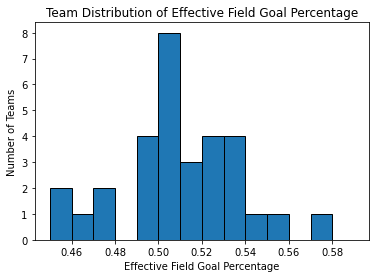

In [7]:
#Viz for 1. team shooting percentage distribution
grpd_teams = basketball.groupby("Tm").mean()
plt.hist(grpd_teams["eFG%"], edgecolor = 'black', 
bins = np.arange(0.45, 0.60, 0.01))
plt.title("Team Distribution of Effective Field Goal Percentage")
plt.xlabel("Effective Field Goal Percentage")
plt.ylabel("Number of Teams");

This histogram confirms what we already predicted: that most teams averaged around 50% for effective field goal percentage.  We see that the mode of this distribution was clustered in the range [0.50, 0.51), which included 8 different teams. The distribution as a whole appeared to be relatively normal, which was also anticipated.

# Question 2

*What statistic tied the most into effective field goal percentage (eFG%)?*

After looking at this distribution, we wondered which statistic tied into effective field goal percentage the most. For this reason, we began our analysis with correlation coefficients for each variable with effective field goal percentage. We then put all of this data into a bar graph for easier interpretation.

In [34]:
#Code for 2. eFG% correlating variables
efg_corr = basketball.corr()[["eFG%"]]
efg_corr = efg_corr.reset_index().rename(columns={"index":"Metrics",  "eFG%":"Correlation with eFG%"})
efg_corr = efg_corr.sort_values(by="Correlation with eFG%", ascending=False)
efg_corr
#https://www.w3schools.com/python/python_ml_multiple_regression.asp

,Metrics,Correlation with eFG%
13,eFG%,1.000000
6,FG%,0.923113
12,2P%,0.707730
9,3P%,0.468365
1,G,0.357048
4,FG,0.330147
19,TRB,0.324064
10,2P,0.313453
25,PTS,0.306018
3,MP,0.304398


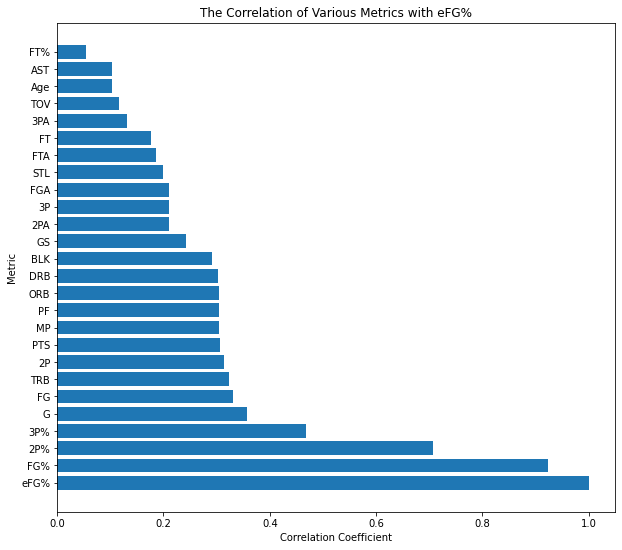

In [9]:
#Bar chart for eFG% correlating values
plt.figure(figsize =(10, 9))
plt.barh(efg_corr["Metrics"], efg_corr["Correlation with eFG%"])
plt.title("The Correlation of Various Metrics with eFG%")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Metric");

Looking at the correlation coefficients of all of the various variables with effective field goal percentage (eFG%), we found some interesting results.

It makes sense that field goal percentage (FG%), 2 point percentage (2P%), and 3 point percentage (3p%) were correlated very highly, as those all directly tie into effective field goal percentage.

The fact that points per game (PTS) had a relatively weak linear relationship, but one that is positive, logically followed, as points are scored when shots are made. Shooting effectively will enable a player to score more points. Nonetheless, we had anticipated a higher correlation for this particular variable.

However, we were very surprised to see that the variable with the weakest correlation coefficient was free throw percentage (FT%). We had  hypothesized that a good free throw shooter would also be a very good shooter in general, and a poor free throw shooter would be a very poor shooter in general. Yet that is not fully borne out in reality. It is possible that because the environment of free throw shooting is so different from that of shooting during the run of play, the two are so separate as to essentially be different skill sets. After all, free throws are able to be sized up without the same level of active stress, so this might cause a player who is terrible at shooting when contested to shoot rather well without such pressure. This would partially explain why our our hypothesis was so incorrect, but this is a question that would be interesting to analyze more deeply.

# Question 3

*Does a higher field goal percentage (FG%) correlate with a higher number of wins?*

We next decided to move to the traditional shooting metric of field goal percentage (FG%). To find if a higher field goal percentage correlates with a higher number of wins, we used a scatter plot and calculated the correlation coefficient.

In [43]:
# Code for number 3. Does higher field goal percentage correlate into a higher amount of wins?
Team_fg = basketball.groupby('Tm').mean()
Team_fg = Team_fg[['FG%']] *100
Team_fg

,FG%
Tm,
ATL,43.172222
BOS,47.100000
BRK,43.444444
CHI,45.554545
CHO,46.288235
CLE,42.144000
DAL,44.200000
DEN,43.280952
DET,46.290476


In [13]:
standings = standings.merge(Team_fg,left_on= "Acronym" , right_on= "Tm")
standings

,W,L,conference,Acronym,Team Name,FG%
0,41,31,eastern,ATL,Atlanta Hawks,43.172222
1,36,36,eastern,BOS,Boston Celtics,47.100000
2,48,24,eastern,BRK,Brooklyn Nets,43.444444
3,33,39,eastern,CHO,Charlotte Hornets,46.288235
4,31,41,eastern,CHI,Chicago Bulls,45.554545
5,22,50,eastern,CLE,Cleveland Cavaliers,42.144000
6,42,30,western,DAL,Dallas Mavericks,44.200000
7,47,25,western,DEN,Denver Nuggets,43.280952
8,20,52,eastern,DET,Detroit Pistons,46.290476
9,39,33,western,GSW,Golden State Warriors,44.516667


In [14]:
W_FG = standings[["W", "FG%"]]
WCORR = W_FG.corr()
WCORR

,W,FG%
W,1.000000,0.015379
FG%,0.015379,1.000000


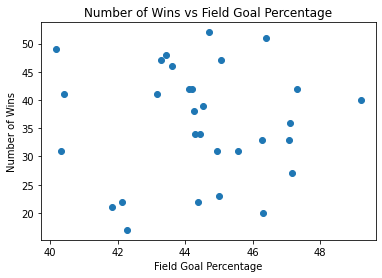

In [15]:
plt.scatter(standings["FG%"], standings["W"])
plt.xlabel("Field Goal Percentage")
plt.ylabel("Number of Wins")
plt.title("Number of Wins vs Field Goal Percentage");

Through viewing our scatter plot, we discovered that there was no direct correlation between field goal percentage and win total. This was confirmed by our correlation coefficient of 0.015379, which demonstrates that there was virtually no correlation between the two variables.

It would be interesting to see if any defensive metrics would correlate more highly with win totals. Perhaps blocks, steals, and turnovers forced would be more revealing than offensive measures like field goal percentage.

# Question 4

*Is there an impact of total games played on the field goal percentage for those players with more than 50 games played? What is the effect for players with less than 50 games played?*

In furthering our analysis of the field goal percentage statistic, we wondered: is there an impact of total games played on the field goal percentages for those players with more than 50 games played? What about for those with less than 50 games played? This analysis, we believed, might reveal some telling results about the value of load management througout the season. Load management has to do with resting players in order to keep the team healthy moving into the postseason.

In [36]:
#Code for 6. What is the impact of total games played on the shooting percentage for those players with more than 50 games played?
over_50_games = (basketball["G"] > 50)
over_50_games = basketball[over_50_games]
over_50_games

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
10,Jarrett Allen\allenja01,C,22,TOT,63,45,29.6,4.7,7.7,0.618,0.1,0.3,0.316,4.6,7.3,0.631,0.624,3.2,4.6,0.703,3.1,6.9,10.0,1.7,0.5,1.4,1.6,1.5,12.8
12,Jarrett Allen\allenja01,C,22,CLE,51,40,30.3,5.0,8.2,0.609,0.1,0.4,0.316,4.9,7.8,0.623,0.616,3.1,4.5,0.690,3.1,6.8,9.9,1.7,0.5,1.4,1.5,1.5,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Zion Williamson\willizi01,PF,20,NOP,61,61,33.2,10.4,17.0,0.611,0.2,0.6,0.294,10.2,16.4,0.622,0.616,6.0,8.7,0.698,2.7,4.5,7.2,3.7,0.9,0.6,2.7,2.2,27.0
698,Delon Wright\wrighde01,SG-PG,28,TOT,63,39,27.7,3.8,8.2,0.463,1.0,2.7,0.372,2.8,5.5,0.509,0.525,1.6,2.0,0.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
701,Thaddeus Young\youngth01,PF,32,CHI,68,23,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
702,Trae Young\youngtr01,PG,22,ATL,63,63,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3


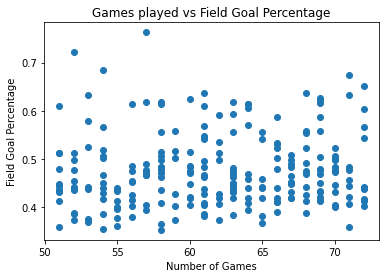

In [37]:
plt.scatter(over_50_games["G"], over_50_games["FG%"])
plt.xlabel("Number of Games")
plt.ylabel("Field Goal Percentage")
plt.title("Games played vs Field Goal Percentage");

In [38]:
G_FG = over_50_games[["G", "FG%"]]
GCORR = G_FG.corr()
GCORR

,G,FG%
G,1.00000,0.08369
FG%,0.08369,1.00000


In [39]:
under_50_games = (basketball["G"] < 50)
under_50_games = basketball[under_50_games]
under_50_games

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
4,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,0.464,1.3,3.6,0.360,4.2,8.2,0.509,0.518,1.5,1.8,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7
6,LaMarcus Aldridge\aldrila01,C,35,BRK,5,5,26.0,5.0,9.6,0.521,0.8,1.0,0.800,4.2,8.6,0.488,0.563,2.0,2.0,1.000,0.4,4.4,4.8,2.6,0.6,2.2,1.4,2.2,12.8
7,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,3.1,0.2,0.8,0.250,0.1,0.6,0.222,0.1,0.2,0.333,0.333,0.1,0.1,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,Christian Wood\woodch01,C,25,HOU,41,41,32.3,8.0,15.6,0.514,1.9,5.0,0.374,6.1,10.6,0.581,0.574,3.0,4.8,0.631,1.9,7.8,9.6,1.7,0.8,1.2,2.0,2.1,21.0
697,Robert Woodard\woodaro01,SF,21,SAC,13,0,3.5,0.6,1.5,0.400,0.1,0.5,0.167,0.5,1.1,0.500,0.425,0.2,0.6,0.375,0.3,0.9,1.2,0.2,0.0,0.2,0.1,0.3,1.5
699,Delon Wright\wrighde01,SG,28,DET,36,31,29.2,3.8,8.1,0.464,0.9,2.5,0.348,2.9,5.7,0.515,0.517,2.0,2.5,0.789,1.0,3.5,4.6,5.0,1.6,0.5,1.3,1.3,10.4
700,Delon Wright\wrighde01,PG,28,SAC,27,8,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.500,0.536,1.1,1.3,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0


In [40]:
G50_FG = under_50_games[["G", "FG%"]]
G50CORR = G50_FG.corr()
G50CORR

,G,FG%
G,1.000000,0.234874
FG%,0.234874,1.000000


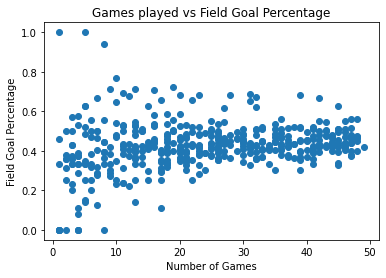

In [41]:
plt.scatter(under_50_games["G"], under_50_games["FG%"])
plt.xlabel("Number of Games")
plt.ylabel("Field Goal Percentage")
plt.title("Games played vs Field Goal Percentage");

Looking at the first visualization, there is no clear correlation between the number of games played, which in this case is more than 50 games, and the field goal percentage on the season. The extremely low correlation coefficient of 0.08369 confirms this conclusion.

Where games played is less than 50, the correlation coefficient increases to 0.234874, which is low, but may suggest some correlation. However, this data needs to be viewed with more caution, as the range of field goal percentage for this group goes from 0.0 (0%) to 1.0 (100%) for some players with less than 10 games played. These values should be viewed with skepticism because the samples for those players in particular are so small with regard to the limited amount of shots that can be taken in such a small number of games played.

Nonetheless, the value of load management for the benefit of shooting percentage could be further explored.

# Question 5

*What was the number one team in the 2020-2021 NBA season? How did that team perform in comparison to itself and to the rest of the league in the past five seasons?*

After this result, we decided to see if we could identify any other interesting trends related to variable effectiveness. This led us to take a look at how the best NBA team for the 2020-2021 season stacked up against itself and its counterparts in the league for the past five seasons. In this case, the best team was the Philadelphia 76ers. To do our analysis, we compared the categories of TRB (total rebounds per game), AST (assists per game), STL (steals per game), BLK (blocks per game), and PTS (points per game).

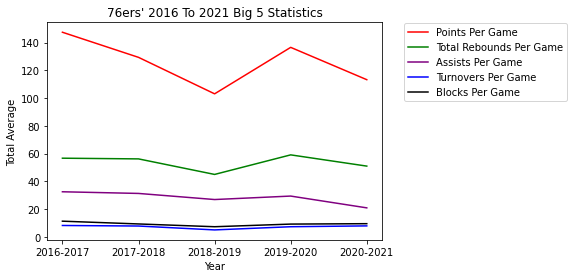

In [44]:
#Viz for 5. Philadelphia 76ers compared to its past self
plt.title("76ers' 2016 To 2021 Big 5 Statistics")     
plt.xlabel('Year')
plt.ylabel('Total Average')
seasons=philly_stats['Season'].reindex([4,3,2,1,0])

plt.plot(seasons,philly_stats['Pts Per Game'],color="red", label="Points Per Game")
plt.plot(seasons,philly_stats['Total Rebounds Per Game'],color="green", label="Total Rebounds Per Game")
plt.plot(seasons,philly_stats['Assists Per Game'],color="purple", label="Assists Per Game")
plt.plot(seasons,philly_stats['Turnovers Per Game'],color="Blue", label="Turnovers Per Game")
plt.plot(seasons,philly_stats['Blocks Per Game'],color="Black", label="Blocks Per Game")


#plt.legend(["Assists Per Game","Total Rebounds Per Game","Blocks Per Game","Turnovers Per Game", "Pts Per Game"],loc=2)
plt.legend(bbox_to_anchor = (1.05, 1.02));

It was clear the 76ers' points per game fluctuated the most. A steady decline can be seen between the 2016-2017 and 2018-2019 seasons, totaling about 50 points. Following that decline was a dramatic incline of about 40 points between the 2018-2019 and the 2019-2020 seasons. Lastly, there was a decline from the 2019-2020 season to the 2020-2021 season of about 35 points.

Total rebounds per game flucuated the second most overall (after points per game). Between the 2016-2017 and the 2017-2018 seasons, there was a steady average of about 58 rebounds per game. Then, from the 2017-2018 season to the 2018-2019 season, there was a decline of about 10 rebounds. From the 2018-2019 to the 2019-2020 season there was an increase of about 20 rebounds, which dropped during the 2020-2021 season by about 10 rebounds. 

Assists per game slowly declined from the 2016-2017 season to 2020-2021 season, totaling about 10 assists less in the latter than in the former.

Turnovers per game and blocks per game have stayed the most consistent over the past 5 seasons out of these five metrics.

This graph can be used to track team progress and determine areas that need to be improved upon for the following years. A team should aim to limit its number of turnovers, so reducing that average could be taken as an area of emphasis. At the same time, a declining number of assists per game might mean that the team isn't passing as cohesively, which can point to a need for more practice in that area.

Following this focus on the 76ers against itself, we looked at the 76ers against the rest of the league.

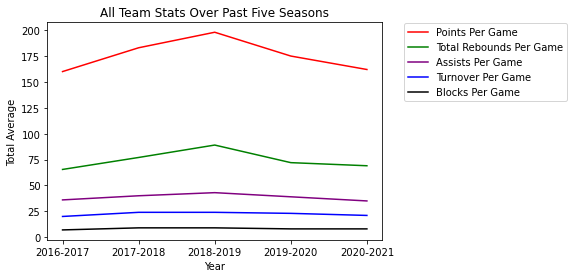

In [45]:
#Viz for 5. All teams stats
plt.title("All Team Stats Over Past Five Seasons")     
plt.xlabel('Year')
plt.ylabel('Total Average')
seasons=other_teams_stats['Season'].reindex([4,3,2,1,0])

plt.plot(seasons,other_teams_stats['Points Per Game'],color="red", label="Points Per Game")
plt.plot(seasons,other_teams_stats['Total Rebounds'],color="Green", label="Total Rebounds Per Game")
plt.plot(seasons,other_teams_stats['Assists'],color="purple", label="Assists Per Game")
plt.plot(seasons,other_teams_stats['Turnover'],color="Blue", label="Turnover Per Game")
plt.plot(seasons,other_teams_stats['Blocks'],color="Black", label="Blocks Per Game")


#plt.legend(["Assists Per Game","Total Rebounds Per Game","Blocks Per Game","Turnovers Per Game", "Pts Per Game"],loc=2)
plt.legend(bbox_to_anchor = (1.05, 1.02));

Looking at both graphs, with the exception of the 2020-2021 season, it was clear the 76ers have performed below average when compared to the rest of the NBA teams in all statistics other than blocks per game. 

The largest difference between the two graphs was in points per game. In the 2018-2019 the average points per game for the entire NBA was almost 200 points, while the 76ers' average during that same season was its lowest of 100 points. That was a nearly 100 point lag compared to the rest of the NBA.

The second largest difference between the 76ers' performance and the rest of the NBA is total rebounds per game. In the 2018-2019 season the 76ers produced 40 fewer rebounds than the rest of the NBA. 

The third largest difference comes from assists per game. The 76ers' number of assists per game was pretty consistent until it came to the 2020-2021 season. It then lagged by about 10 assists per game. 

The 76ers' number of turnovers per game throughout the past five seasons was consistently about 10 turnovers fewer than the rest of the NBA. This can be viewed favorably by the 76ers organization, as limiting turnovers is desirable for a basketball team.

The only statistic that was consistent with the average of the rest of the NBA through the past 5 seasons was blocks per game.

It should be noted that for all of these statistics, the nature of adding up the per game averages of each player obfuscates the data to a certain extent when compared with the real numbers. However, because we added up per game averages for all teams, the standard is the same throughout and our comparisons are legitimate.

# Question 6

*Do players with a high number of steals also have a high number of assists?*

In the interest of exploring our preconceived hypotheses, we wanted to formally analyze the relationship between two metrics in particlar: steals per game (STL) and assists per game (AST). Thus, we asked: do players with a high number of steals also have a high number of assists? For this, we decided to create another scatter plot.

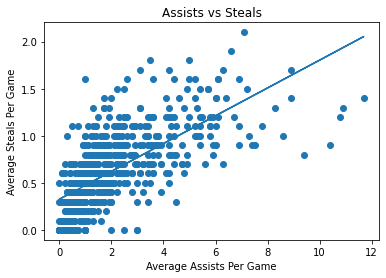

In [42]:
#Viz for 6. correlation between assists and steals
plt.scatter(basketball["AST"], basketball["STL"])
plt.title("Assists vs Steals")
plt.xlabel("Average Assists Per Game")
plt.ylabel("Average Steals Per Game")
x = np.array(basketball["AST"])
y = np.array(basketball["STL"])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b);

In [17]:
assists_steals = basketball[["AST", "STL"]]
corr_df = assists_steals.corr()
corr_df

,AST,STL
AST,1.000000,0.680935
STL,0.680935,1.000000


This scatter plot and the accompanying correlation coefficient of 0.680935 demonstrate that there was a positive and linear relationship between the average number of steals per game and the average number of assists per game for a given individual player. That answered our original question, as it became clear that some sort of correlation existed. We then decided to break this plot down by position.

In [18]:
where_center = (basketball["Pos"] == "C")
avg_center = basketball[where_center]
where_sg = (basketball["Pos"] == "SG")
avg_sg = basketball[where_sg]
where_pg = (basketball["Pos"] == "PG")
avg_pg = basketball[where_pg]
where_pf = (basketball["Pos"] == "PF")
avg_pf = basketball[where_pf]
where_sf = (basketball["Pos"] == "SF")
avg_sf = basketball[where_sf]

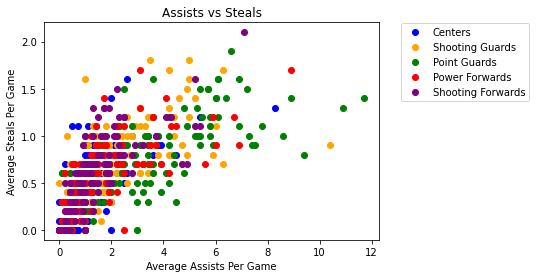

In [19]:
plt.scatter(avg_center["AST"], avg_center["STL"], color="blue", label = "Centers")
plt.scatter(avg_sg["AST"], avg_sg["STL"], color="orange", label = "Shooting Guards")
plt.scatter(avg_pg["AST"], avg_pg["STL"], color="green", label = "Point Guards")
plt.scatter(avg_pf["AST"], avg_pf["STL"], color="red", label = "Power Forwards")
plt.scatter(avg_sf["AST"], avg_sf["STL"], color="purple", label = "Shooting Forwards")
plt.title("Assists vs Steals")
plt.xlabel("Average Assists Per Game")
plt.ylabel("Average Steals Per Game")
plt.legend(bbox_to_anchor = (1.05, 1.02));

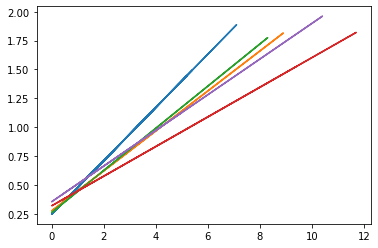

In [35]:
w = np.array(avg_sf["AST"])
z = np.array(avg_sf["STL"])
mm, bb = np.polyfit(w, z, 1)
plt.plot(w, mm * w + bb)
n = np.array(avg_pf["AST"])
o = np.array(avg_pf["STL"])
mmm, bbb = np.polyfit(n, o, 1)
plt.plot(n, mmm * n + bbb)
g = np.array(avg_center["AST"])
h = np.array(avg_center["STL"])
mmmm, bbbb = np.polyfit(g, h, 1)
plt.plot(g, mmmm * g + bbbb)
r = np.array(avg_pg["AST"])
s = np.array(avg_pg["STL"])
mmmmm, bbbbb = np.polyfit(r, s, 1)
plt.plot(r, mmmmm * r + bbbbb)
d = np.array(avg_sg["AST"])
e = np.array(avg_sg["STL"])
mmmmmm, bbbbbb = np.polyfit(d, e, 1)
plt.plot(d, mmmmmm * d + bbbbbb);

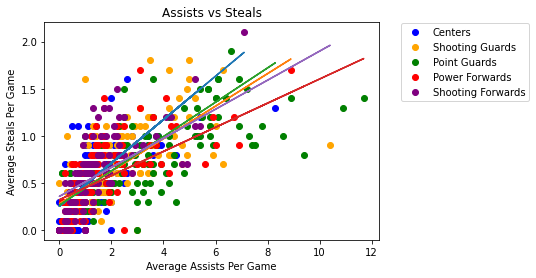

In [21]:
plt.scatter(avg_center["AST"], avg_center["STL"], color="blue", label = "Centers")
plt.scatter(avg_sg["AST"], avg_sg["STL"], color="orange", label = "Shooting Guards")
plt.scatter(avg_pg["AST"], avg_pg["STL"], color="green", label = "Point Guards")
plt.scatter(avg_pf["AST"], avg_pf["STL"], color="red", label = "Power Forwards")
plt.scatter(avg_sf["AST"], avg_sf["STL"], color="purple", label = "Shooting Forwards")
plt.title("Assists vs Steals")
plt.xlabel("Average Assists Per Game")
plt.ylabel("Average Steals Per Game")
plt.legend(bbox_to_anchor = (1.05, 1.02))
w = np.array(avg_sf["AST"])
z = np.array(avg_sf["STL"])
mm, bb = np.polyfit(w, z, 1)
plt.plot(w, mm * w + bb)
n = np.array(avg_pf["AST"])
o = np.array(avg_pf["STL"])
mmm, bbb = np.polyfit(n, o, 1)
plt.plot(n, mmm * n + bbb)
g = np.array(avg_center["AST"])
h = np.array(avg_center["STL"])
mmmm, bbbb = np.polyfit(g, h, 1)
plt.plot(g, mmmm * g + bbbb)
r = np.array(avg_pg["AST"])
s = np.array(avg_pg["STL"])
mmmmm, bbbbb = np.polyfit(r, s, 1)
plt.plot(r, mmmmm * r + bbbbb)
d = np.array(avg_sg["AST"])
e = np.array(avg_sg["STL"])
mmmmmm, bbbbbb = np.polyfit(d, e, 1)
plt.plot(d, mmmmmm * d + bbbbbb);

The above plots gave us some notion that certain positions may have more pronounced correlations, but it was difficult for us to pick out particulars.  Instead of using a scatter plot, we decided to calculate correlation coefficients for each position and make a bar graph to easily compare them.

In [22]:
sf_check = avg_sf[["AST", "STL"]]
sf_corr = sf_check.corr()
sf_corr

,AST,STL
AST,1.000000,0.740107
STL,0.740107,1.000000


In [23]:
pg_check = avg_pg[["AST", "STL"]]
pg_corr = pg_check.corr()
pg_corr

,AST,STL
AST,1.000000,0.713344
STL,0.713344,1.000000


In [24]:
sg_check = avg_sg[["AST", "STL"]]
sg_corr = sg_check.corr()
sg_corr

,AST,STL
AST,1.000000,0.635247
STL,0.635247,1.000000


In [25]:
c_check = avg_center[["AST", "STL"]]
c_corr = c_check.corr()
c_corr

,AST,STL
AST,1.0000,0.6162
STL,0.6162,1.0000


In [26]:
pf_check = avg_pf[["AST", "STL"]]
pf_corr = pf_check.corr()
pf_corr

,AST,STL
AST,1.000000,0.699959
STL,0.699959,1.000000


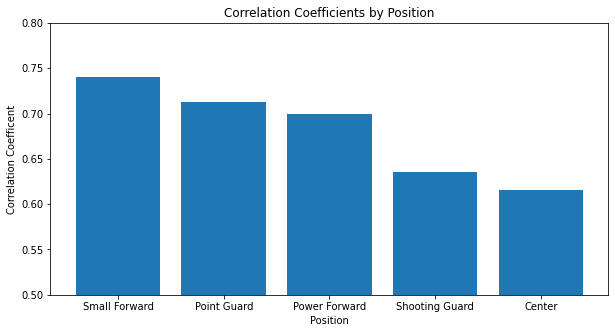

In [27]:
plt.figure(figsize =(10, 5))
plt.bar(np.array(["Small Forward", "Point Guard", "Power Forward", "Shooting Guard", "Center"]), np.array([0.740107, 0.713344, 0.699959, 0.635247, 0.6162]))
plt.title("Correlation Coefficients by Position")
plt.xlabel("Position")
plt.ylabel("Correlation Coefficent")
plt.ylim(0.5, 0.8);

As can be seen, the greatest correlation was found among Small Forwards, with Point Guards second.  This observation was very surprising.  Traditionally, it is the Point Guard's role to distribute the basketball, leading to many assists, and also to act as an agile and quick-thinking help defender, leading to many steals. However, the game has changed over the years, and the role of the Small Forward has evolved, which may explain why that is the position with the highest correlation coefficient. This would be another good question to explore with more detailed and high-level analytical procedures.

# 4. Conclusion

Once again, our goal for this project was to find the best basketball gameplay statistics. To reiterate our findings, we identified that:

1. A plurality of teams had an effective field goal percentage between 50% and 51% during the 2020-2021 NBA season. The rest of the data was normally distributed around this bin.
1. Field goal percentage, 2 point percentage, and 3 point percentage were the most highly correlating variables with effective field goal percentage. We were very surprised to find that free throw percentage was not highly correlated.
1. During the 2020-2021 season, there was no direct correlation between field goal percentage and win total.
1. For those with more than 50 games played, there was no correlation between number of games played and field goal percentage. There was a weak correlation coefficient between the two for those with less than 50 games played.
1. The best team was found to be the Philadelphia 76ers. Its numbers of blocks and turnovers per game remained consistent, its assists per game increased, and its points and rebounds per game fluctuated widely over the five years of our study. Additionally, its averages generally lagged behind those of the rest of the NBA, though it did average fewer turnovers per game and more blocks per game.
1. There was a positive correlation between number of steals per game and number of assists per game. Small Fowards had the highest correlation coefficient between steals per game and assists per game.

Given more time, we would ask the following questions:
* Why does free throw percentage have such a small correlation with effective field goal percentage?
* Do defensive metrics correlate with higher win totals?
*Why is it that Small Forwards have the highest correlation coefficient between steals and assists?

We believe that using some more advanced analysis techniques would answer some of these questions. Also helpful would be incorporating some more advanced statistical measures that weren't included in the dataset we used. Advanced metrics such as Win Shares, Box Plus Minus, and Player Efficiency Rating, if they could be calculated using the data which we have access to or brought in from another source, would certainly be helpful for a deeper analysis.